## first lab: CLEANING NUMERICAL DATA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

displaying main features (head, shape, info)

In [2]:
customer_df = pd.read_csv("we_fn_use_c_marketing_customer_value_analysis.csv")
display(customer_df.head())
display(customer_df.shape)
display(customer_df.info)

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


(9134, 24)

<bound method DataFrame.info of      Customer       State  Customer Lifetime Value Response  Coverage  \
0     BU79786  Washington              2763.519279       No     Basic   
1     QZ44356     Arizona              6979.535903       No  Extended   
2     AI49188      Nevada             12887.431650       No   Premium   
3     WW63253  California              7645.861827       No     Basic   
4     HB64268  Washington              2813.692575       No     Basic   
...       ...         ...                      ...      ...       ...   
9129  LA72316  California             23405.987980       No     Basic   
9130  PK87824  California              3096.511217      Yes  Extended   
9131  TD14365  California              8163.890428       No  Extended   
9132  UP19263  California              7524.442436       No  Extended   
9133  Y167826  California              2611.836866       No  Extended   

     Education Effective To Date EmploymentStatus Gender  Income  ...  \
0     Bachelor    

making snake case labels; special editing for column "employmentStatus"

In [3]:
cols=[]
for i in customer_df.columns:
    cols.append(i.lower())
customer_df.columns = cols
customer_df.columns = customer_df.columns.str.replace(' ', '_')
customer_df = customer_df.rename(columns = {"employmentstatus":"employment_status"})
customer_df.columns

Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employmentstatus', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size'],
      dtype='object')

setting max columns bcs it looks better and there are only 24 columns, it wouldn't hurt, I guess

In [5]:
pd.set_option('display.max_columns', None)

turning column effective_to_date into datetime type

In [99]:
customer_df["effective_to_date"] = customer_df["effective_to_date"].astype("datetime64[ns]")
type(customer_df["effective_to_date"][0])

pandas._libs.tslibs.timestamps.Timestamp

separating continuous and discrete columns

first: separate all numerical columns from the dataframe

In [100]:
customer_df.head(1)

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employment_status,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize


In [58]:
numerical_df = customer_df.select_dtypes(include=np.number)

then see which column(s) contains how many unique values.

we want to put columns with up to 200s unique values to our discrete_df and the rest to continuous_df

In [78]:
numerical_df.nunique()

customer_lifetime_value          8041
income                           5694
monthly_premium_auto              202
months_since_last_claim            36
months_since_policy_inception     100
number_of_open_complaints           6
number_of_policies                  9
total_claim_amount               5106
dtype: int64

this is me reviewing python fundamentals before making the function

In [69]:
# learning how to get the count of unique values
# learning how to turn something to a list
# (numerical_df.nunique().tolist())

In [ ]:
# Esraa sent me this. forgot to ask what this line was for
# for col in data.columns:
#     print (len(data[col].value_counts()),'        ',col)

In [70]:
# learning how to create a new dataframe
# a = pd.DataFrame()
# a

In [92]:
# learning pandas indexing
# print(numerical_df.iloc[:,0])
# numerical_df.columns[0]

In [ ]:
# from Erin
# for i in data_num.columns:
#     if len(data_num[i].unique()) > 300:
#         continuous_lst.append(i)
#     else:
#         discrete_lst.append(i)

making function to split numerical_df into discrete and cont, based on the count of unique values of each column

In [68]:
def con_dis(df):
    con = pd.DataFrame()
    dis = pd.DataFrame()
    for i in range(len(df.nunique().tolist())):
        if df.nunique().tolist()[i] > 250:
            con[df.columns[i]] = df.iloc[:,i]
        else:
            dis[df.columns[i]] = df.iloc[:,i]
    return con, dis

continuous_df, discrete_df = con_dis(numerical_df)
display(discrete_df.nunique())
display(continuous_df.nunique())
display(discrete_df.head())
display(continuous_df.head())

monthly_premium_auto             202
months_since_last_claim           36
months_since_policy_inception    100
number_of_open_complaints          6
number_of_policies                 9
dtype: int64

customer_lifetime_value    8041
income                     5694
total_claim_amount         5106
dtype: int64

,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
0,69,32,5,0,1
1,94,13,42,0,8
2,108,18,38,0,2
3,106,18,65,0,7
4,73,12,44,0,1


,customer_lifetime_value,income,total_claim_amount
0,2763.519279,56274,384.811147
1,6979.535903,0,1131.464935
2,12887.431650,48767,566.472247
3,7645.861827,0,529.881344
4,2813.692575,43836,138.130879


heatmap

I'll let this one go bcs it's colorful

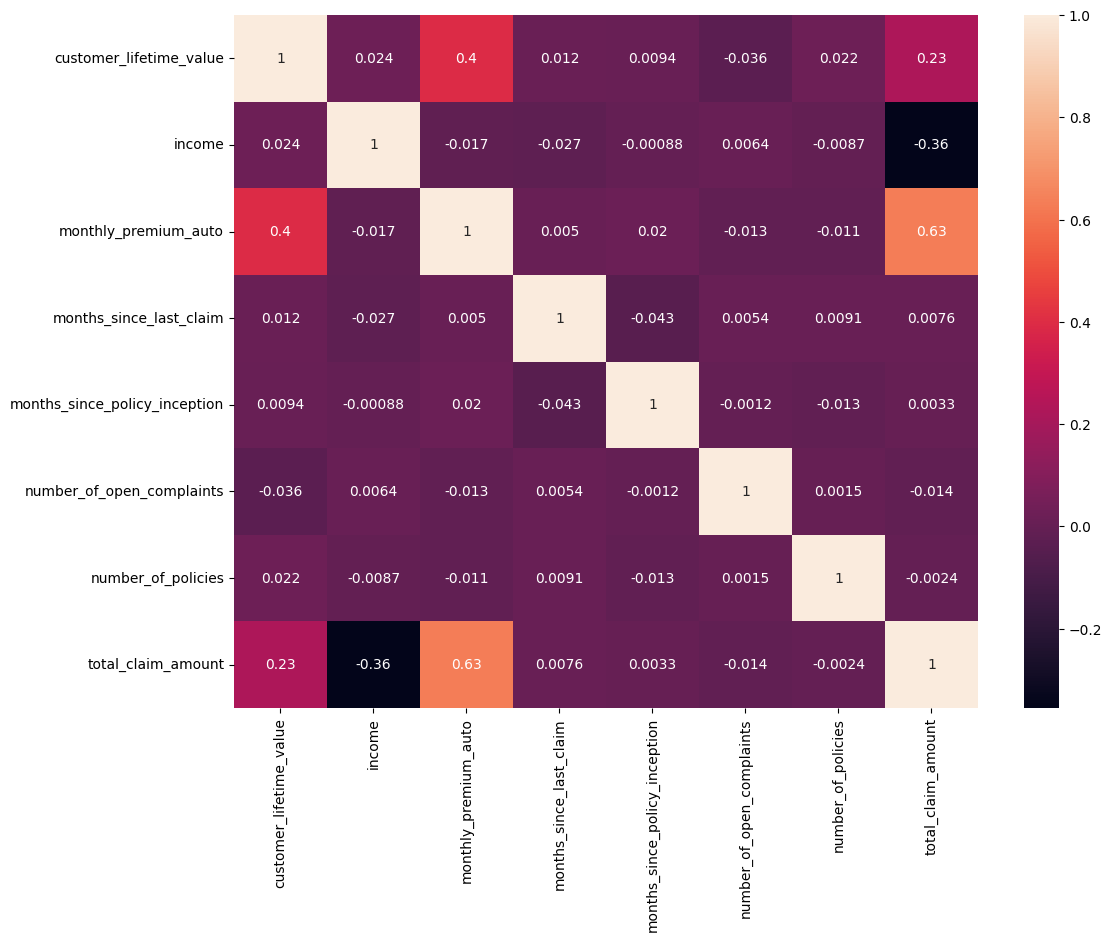

In [72]:
plt.figure(figsize=(12, 9))
correlations_matrix = customer_df.corr()
sns.heatmap(correlations_matrix, annot=True)
plt.show()

correlation matrix

In [10]:
correlations_matrix

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
customer_lifetime_value,1.000000,0.024366,0.396262,0.011517,0.009418,-0.036343,0.021955,0.226451
income,0.024366,1.000000,-0.016665,-0.026715,-0.000875,0.006408,-0.008656,-0.355254
monthly_premium_auto,0.396262,-0.016665,1.000000,0.005026,0.020257,-0.013122,-0.011233,0.632017
months_since_last_claim,0.011517,-0.026715,0.005026,1.000000,-0.042959,0.005354,0.009136,0.007563
months_since_policy_inception,0.009418,-0.000875,0.020257,-0.042959,1.000000,-0.001158,-0.013333,0.003335
number_of_open_complaints,-0.036343,0.006408,-0.013122,0.005354,-0.001158,1.000000,0.001498,-0.014241
number_of_policies,0.021955,-0.008656,-0.011233,0.009136,-0.013333,0.001498,1.000000,-0.002354
total_claim_amount,0.226451,-0.355254,0.632017,0.007563,0.003335,-0.014241,-0.002354,1.000000


In [11]:
# theres some correlations, one of the highest would be between total_claim_amount and monthly_premium_auto
# if we are about to build models, we might build it without dropping those correlated columns

In [12]:
customer_df.columns

Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employment_status', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size'],
      dtype='object')

looping the plot for every columns of each df

graphs take space, it's tiring to scroll through them

In [91]:
# for i in discrete_df.columns:
#     sns.displot(x = i, data = discrete_df, bins=30)
#     plt.show()

In [14]:
# as for income, we could make bins
# for number_of_open_complaints we can leave it as it is
# for number_of_policies, we might want to group 4-9 into one category

graphs take space, it's tiring to scroll through them

In [90]:
# for i in continuous_df.columns:
#     sns.histplot(x = i, data = continuous_df, bins=30)
#     plt.show()

In [17]:
# comment what you see in the plots
# will do it later

looking for outliers: use boxplots!

graphs take space, it's tiring to scroll through them

In [88]:
# for i in discrete_df.columns:
#     sns.histplot(x = i, data = discrete_df)
#     plt.show()

graphs take space, it's tiring to scroll through them

In [89]:
# for i in continuous_df.columns:
#     sns.boxplot(x = i, data = continuous_df)
#     plt.show()

In [21]:
# boxplot seems better for the continuous_df, while
# it doesnt bring us much information with the discrete_df
# for discrete_df we find histplot a better option to see the outliers

for the outliers: we're probably gonna drop them. but it depends on the variable and the values inside them. we can either use mean, mode, or drop them 

In [22]:
customer_df.isna().sum()

customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employment_status                0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64

no NaNs. nice

## next lab: CLEANING CATEGORICAL DATA 

In [101]:
categorical_df = customer_df.select_dtypes(include=[np.object])
categorical_df.head(2)

C:\Users\mdima\AppData\Local\Temp\ipykernel_28296\2472698844.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categorical_df = customer_df.select_dtypes(include=[np.object])


,customer,state,response,coverage,education,employment_status,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize


checking for NaNs

In [25]:
categorical_df.isna().sum()

customer             0
state                0
response             0
coverage             0
education            0
employment_status    0
gender               0
location_code        0
marital_status       0
policy_type          0
policy               0
renew_offer_type     0
sales_channel        0
vehicle_class        0
vehicle_size         0
dtype: int64

no NaNs. nice

check all unique values in all columns, to decide what to do with each of them

In [26]:
for i in categorical_df.columns:
    print("column", i+":")
    display(categorical_df[i].value_counts(dropna = False))

column customer:


BU79786    1
PU81096    1
CO75086    1
WW52683    1
XO38850    1
          ..
HS14476    1
YL91587    1
CT18212    1
EW35231    1
Y167826    1
Name: customer, Length: 9134, dtype: int64

column state:


California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: state, dtype: int64

column response:


No     7826
Yes    1308
Name: response, dtype: int64

column coverage:


Basic       5568
Extended    2742
Premium      824
Name: coverage, dtype: int64

column education:


Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: education, dtype: int64

column employment_status:


Employed         5698
Unemployed       2317
Medical Leave     432
Disabled          405
Retired           282
Name: employment_status, dtype: int64

column gender:


F    4658
M    4476
Name: gender, dtype: int64

column location_code:


Suburban    5779
Rural       1773
Urban       1582
Name: location_code, dtype: int64

column marital_status:


Married     5298
Single      2467
Divorced    1369
Name: marital_status, dtype: int64

column policy_type:


Personal Auto     6788
Corporate Auto    1968
Special Auto       378
Name: policy_type, dtype: int64

column policy:


Personal L3     3426
Personal L2     2122
Personal L1     1240
Corporate L3    1014
Corporate L2     595
Corporate L1     359
Special L2       164
Special L3       148
Special L1        66
Name: policy, dtype: int64

column renew_offer_type:


Offer1    3752
Offer2    2926
Offer3    1432
Offer4    1024
Name: renew_offer_type, dtype: int64

column sales_channel:


Agent          3477
Branch         2567
Call Center    1765
Web            1325
Name: sales_channel, dtype: int64

column vehicle_class:


Four-Door Car    4621
Two-Door Car     1886
SUV              1796
Sports Car        484
Luxury SUV        184
Luxury Car        163
Name: vehicle_class, dtype: int64

column vehicle_size:


Medsize    6424
Small      1764
Large       946
Name: vehicle_size, dtype: int64

some of the columns might need to be changed into binaries (?), like
instead of F and M in gender, we could change it into 1 for female and 0 for male

we might use onehot to encode almost all the columns here except customer. either exclude it so it doesnt get onehot,
or just drop the whole column customer, since the values are all-unique. we won't (probably) get any significant informations from an all-unique column

we could try seeing the correlation matrix to check whether the subcategories (L1 - L3) from the column policy have
collinearity with other columns. if they show muilticollinearity, we could drop the column policy and keep just the 
policy type instead. (will do the corr_matrix later/tomorrow/some other time)

for the policy/policy-type, either one needs to be dropped, since it just repeats the information. most probably the column policy has some multicollinearity with other columns so we might want to drop it

as for renew_offer_type, it doesnt hurt to keep it. unless we find multicollinearity in heatmap

continuing our "what we could do"

- combine the value master and doctor as a "higher educational degree"
- combine college with bachelor as "college" or some other name

- make 1 bigger category consists of luxury cars, luxury suv, and sport cars

- combine medical leave with employed. or search the definition about it. but combining them sounds nice
- might combine medical_leave and disabled into 1 new category
- might combine retired with unemployed

dropping the whole column "customer"

In [106]:
try:
    categorical_df = categorical_df.drop(["customer"], axis = 1)
    print("deleted the column.")
except:
    print("column already deleted.")
categorical_df.head(0)

column already deleted.


,state,response,coverage,education,employment_status,gender,location_code,marital_status,policy_type,renew_offer_type,sales_channel,vehicle_class,vehicle_size


dropping the whole column "policy"

In [107]:
try:
    categorical_df = categorical_df.drop(["policy"], axis = 1)
    print("deleted the column.")
except:
    print("column already deleted.")
categorical_df.head(0)

column already deleted.


,state,response,coverage,education,employment_status,gender,location_code,marital_status,policy_type,renew_offer_type,sales_channel,vehicle_class,vehicle_size


redefining unique values we want to keep in column "vehicle_class"

In [33]:
categorical_df['vehicle_class'] = np.where(categorical_df.vehicle_class.isin(["Sports Car","Luxury SUV","Luxury Car"]),'Luxury Cars', categorical_df.vehicle_class)
categorical_df['vehicle_class'].value_counts()

Four-Door Car    4621
Two-Door Car     1886
SUV              1796
Luxury Cars       831
Name: vehicle_class, dtype: int64

redefining unique values we want to keep in column "education"

In [34]:
def clean_education(x):
    if x in ["Master", "Doctor"]:
        return 'higher educational degree'
    elif x in ["Bachelor", "College"]:
        return "baccalaureate degree"
    else:
        return x

categorical_df['education'] = categorical_df['education'].apply(clean_education)
categorical_df['education'].value_counts()


baccalaureate degree         5429
High School or Below         2622
higher educational degree    1083
Name: education, dtype: int64

redefining unique values we want to keep in column "employment_status"

In [35]:
categorical_df['employment_status'] = np.where(categorical_df.employment_status.isin(["Medical Leave","Disabled"]),'M-D_related_leave', categorical_df.employment_status)
categorical_df['employment_status'] = np.where(categorical_df.employment_status.isin(["Retired"]),'Unemployed', categorical_df.employment_status)
categorical_df['employment_status'].value_counts()


Employed             5698
Unemployed           2599
M-D_related_leave     837
Name: employment_status, dtype: int64

### final check

In [39]:
categorical_df.head(2)

,state,response,coverage,education,employment_status,gender,location_code,marital_status,policy_type,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,baccalaureate degree,Employed,F,Suburban,Married,Corporate Auto,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,baccalaureate degree,Unemployed,F,Suburban,Single,Personal Auto,Offer3,Agent,Four-Door Car,Medsize


just listing what's done here
- dropped the column "customer"
- dropped column "policy"
- simplified "education" column
- simplified "vehicle_class" column
- simplified "employment_status" column


## next lab: FEATURE EXTRACTION 

graphs take space, it's tiring to scroll through them

In [87]:
# for i in categorical_df.columns:
#     sns.histplot(data = categorical_df[i])
#     plt.show()

plotting datetime

In [83]:
customer_df.head(10)

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employment_status,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
5,OC83172,Oregon,8256.297800,Yes,Basic,Bachelor,2011-01-25,Employed,F,62902,Rural,Married,69,14,94,0,2,Personal Auto,Personal L3,Offer2,Web,159.383042,Two-Door Car,Medsize
6,XZ87318,Oregon,5380.898636,Yes,Basic,College,2011-02-24,Employed,F,55350,Suburban,Married,67,0,13,0,9,Corporate Auto,Corporate L3,Offer1,Agent,321.600000,Four-Door Car,Medsize
7,CF85061,Arizona,7216.100311,No,Premium,Master,2011-01-18,Unemployed,M,0,Urban,Single,101,0,68,0,4,Corporate Auto,Corporate L3,Offer1,Agent,363.029680,Four-Door Car,Medsize
8,DY87989,Oregon,24127.504020,Yes,Basic,Bachelor,2011-01-26,Medical Leave,M,14072,Suburban,Divorced,71,13,3,0,2,Corporate Auto,Corporate L3,Offer1,Agent,511.200000,Four-Door Car,Medsize
9,BQ94931,Oregon,7388.178085,No,Extended,College,2011-02-17,Employed,F,28812,Urban,Married,93,17,7,0,8,Special Auto,Special L2,Offer2,Branch,425.527834,Four-Door Car,Medsize


In [115]:
customer_df["year"] = pd.DatetimeIndex(customer_df['effective_to_date']).year
customer_df["month"] = pd.DatetimeIndex(customer_df['effective_to_date']).month
customer_df.head(1)

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employment_status,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,year,month
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,2011,2


In [122]:
display(customer_df["year"].value_counts(dropna = 0))
display(customer_df["month"].value_counts(dropna = 0))

2011    9134
Name: year, dtype: int64

1    4898
2    4236
Name: month, dtype: int64

In [121]:
y = customer_df.pivot_table(index = "month", values = "monthly_premium_auto", aggfunc = {"monthly_premium_auto":"sum"})
y

,monthly_premium_auto
month,
1,454791
2,396674


ValueError: x and y must have same first dimension, but have shapes (9134,) and (2, 1)

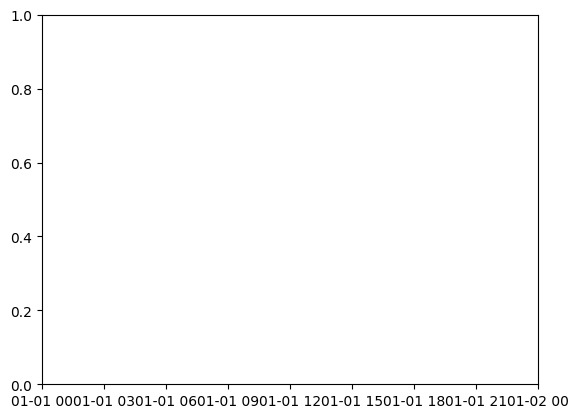

In [120]:
import matplotlib.pyplot
import matplotlib.dates



x_values = customer_df["month"]
y_values = customer_df["monthly_premium_auto"]

dates = matplotlib.dates.date2num(x_values)
matplotlib.pyplot.plot_date(dates, y)